In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

### ***SAMPLE DATASET***

In [ ]:
data = pd.read_csv("/content/imdb_top_1000.csv")
data.head()


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000"


### ***TESTING CORRELATION ***

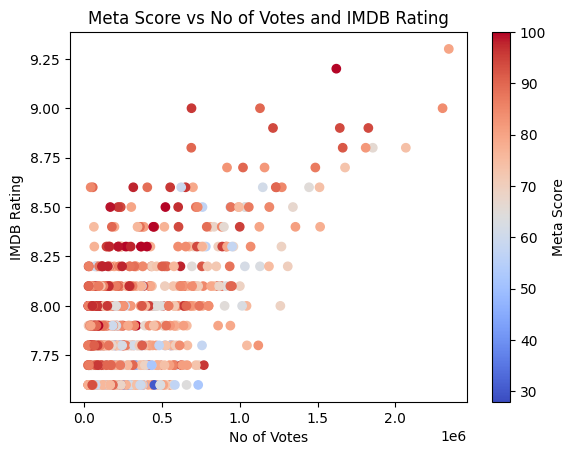

In [ ]:
x = data['No_of_Votes']
y = data['IMDB_Rating']
z = data['Meta_score']
plt.scatter(x, y, c = z, cmap='coolwarm')
plt.xlabel('No of Votes')
plt.ylabel('IMDB Rating')
plt.title('Meta Score vs No of Votes and IMDB Rating')
cbar = plt.colorbar()
cbar.set_label('Meta Score')
plt.show()


In [ ]:
X_train = data[['IMDB_Rating', 'No_of_Votes']]
not_null = data[data['Meta_score'].notnull()]
X_train = X_train.loc[not_null.index]
y_train = not_null['Meta_score']
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
X_test = data[data['Meta_score'].isnull()][['IMDB_Rating', 'No_of_Votes']]
y_pred = regression_model.predict(X_test)
data.loc[data['Meta_score'].isnull(), 'Meta_score'] = y_pred
data.dropna(subset=['Gross'], inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   831 non-null    object 
 1   Released_Year  831 non-null    object 
 2   Certificate    785 non-null    object 
 3   Runtime        831 non-null    object 
 4   Genre          831 non-null    object 
 5   IMDB_Rating    831 non-null    float64
 6   Overview       831 non-null    object 
 7   Meta_score     831 non-null    float64
 8   Director       831 non-null    object 
 9   Star1          831 non-null    object 
 10  Star2          831 non-null    object 
 11  Star3          831 non-null    object 
 12  Star4          831 non-null    object 
 13  No_of_Votes    831 non-null    int64  
 14  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 103.9+ KB


In [ ]:
data['Runtime'] = data['Runtime'].str.replace(" min","")
data['Runtime'] = pd.to_numeric(data['Runtime'])
data['Gross'] = data['Gross'].str.replace(",","")
data['Gross'] = pd.to_numeric(data['Gross'])


              Runtime  IMDB_Rating  Meta_score  No_of_Votes     Gross
Runtime      1.000000     0.246756    0.004661     0.173205  0.139671
IMDB_Rating  0.246756     1.000000    0.305206     0.551261  0.095923
Meta_score   0.004661     0.305206    1.000000    -0.019745 -0.054973
No_of_Votes  0.173205     0.551261   -0.019745     1.000000  0.574393
Gross        0.139671     0.095923   -0.054973     0.574393  1.000000


<ipython-input-10-6623e807ecfd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


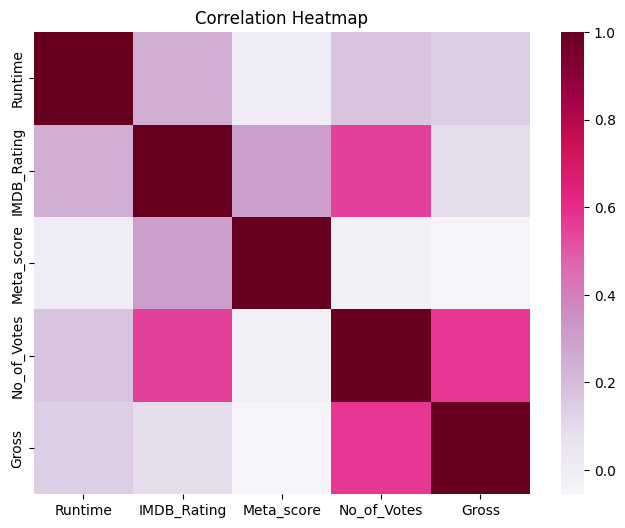

In [ ]:
corr_matrix = data.corr()
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='PuRd', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

  ## ***DESCRIPTIVE STATISTICS***



In [ ]:
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,831.00,831.00,831.00,831.00,831.00
mean,124.08,7.95,77.97,315249.86,68034750.87
std,27.50,0.28,12.02,343644.34,109750043.19
min,45.00,7.60,28.00,25088.00,1305.00
25%,104.00,7.70,71.00,71430.00,3253559.00
50%,120.00,7.90,79.91,186734.00,23530892.00
75%,138.00,8.10,86.00,445721.00,80750893.50
max,242.00,9.30,100.00,2343110.00,936662225.00


### ***CORRELATION ANALYSIS***

In [ ]:
temp = ['Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']
for i in range(len(temp)):
  for j in temp[i:]:
    if temp[i] == j:
      continue
    x = data[temp[i]]
    y = data[j]
    corr_coeff , p_value = map(float,pearsonr(x,y))
    if p_value < 0.05:
      print("Strong Corrrelation between "+temp[i]+" and "+j)
    elif p_value >= 0.05:
      print("Weak Correlation between "+temp[i]+" and "+j)
    elif p_value < 0:
      print("Negative Correlation between "+temp[i]+" and "+j)
    elif p_value == 0:
      print("Linear Correlation between "+temp[i]+" and "+j)
    else:
      pass

Strong Corrrelation between Runtime and IMDB_Rating
Weak Correlation between Runtime and Meta_score
Strong Corrrelation between Runtime and No_of_Votes
Strong Corrrelation between Runtime and Gross
Strong Corrrelation between IMDB_Rating and Meta_score
Strong Corrrelation between IMDB_Rating and No_of_Votes
Strong Corrrelation between IMDB_Rating and Gross
Weak Correlation between Meta_score and No_of_Votes
Weak Correlation between Meta_score and Gross
Strong Corrrelation between No_of_Votes and Gross


In [ ]:
data_copy = data.copy()
data_copy['Genre'] = data_copy['Genre'].str.split(',')
genre_data = pd.DataFrame({'Movie': data_copy['Series_Title'],'Genre': data_copy['Genre'].explode(),'Gross': data_copy['Gross']})
average = genre_data.groupby('Genre')['Gross'].mean().sort_values(ascending = False)
average_head = pd.DataFrame(average.head(3))
print("THESE GENRES HAVE THE MAXIMUM AVERAGE GROSS: ")
for i in range(len(average_head)):
  print(str(i+1) + ". " + average_head.index[i] + " with a Gross of " + "%.2f"%(average_head.iloc[i]['Gross']))
print("\n")
director_data = data[['Director', 'Gross']]
director_average_gross = director_data.groupby('Director')['Gross'].mean().sort_values(ascending=False)
director_average_gross = director_average_gross.head(3)
print("TOP DIRECTORS BY THEIR AVERAGE GROSS")
for i in range(len(director_average_gross)):
    print(str(i+1) + ". " + director_average_gross.index[i] + " with a Gross of " + "%.2f"%(director_average_gross.iloc[i]))
print("\n")
actor_data = data[['Star1', 'Gross']]
actor_average_gross = actor_data.groupby('Star1')['Gross'].mean().sort_values(ascending=False)
actor_average_gross = actor_average_gross.head(3)
print("TOP HEROS BY THEIR AVERAGE GROSS")
for i in range(len(actor_average_gross)):
    print(str(i+1) + ". " + actor_average_gross.index[i] + " with a Gross of " + "%.2f"%(actor_average_gross.iloc[i]))


THESE GENRES HAVE THE MAXIMUM AVERAGE GROSS: 
1. Family with a Gross of 219555277.00
2.  Adventure with a Gross of 210096908.12
3.  Sci-Fi with a Gross of 148026397.05


TOP DIRECTORS BY THEIR AVERAGE GROSS
1. Anthony Russo with a Gross of 551259850.75
2. Gareth Edwards with a Gross of 532177324.00
3. J.J. Abrams with a Gross of 474390301.67


TOP HEROS BY THEIR AVERAGE GROSS
1. Daisy Ridley with a Gross of 936662225.00
2. Sam Worthington with a Gross of 760507625.00
3. Joe Russo with a Gross of 551259850.75


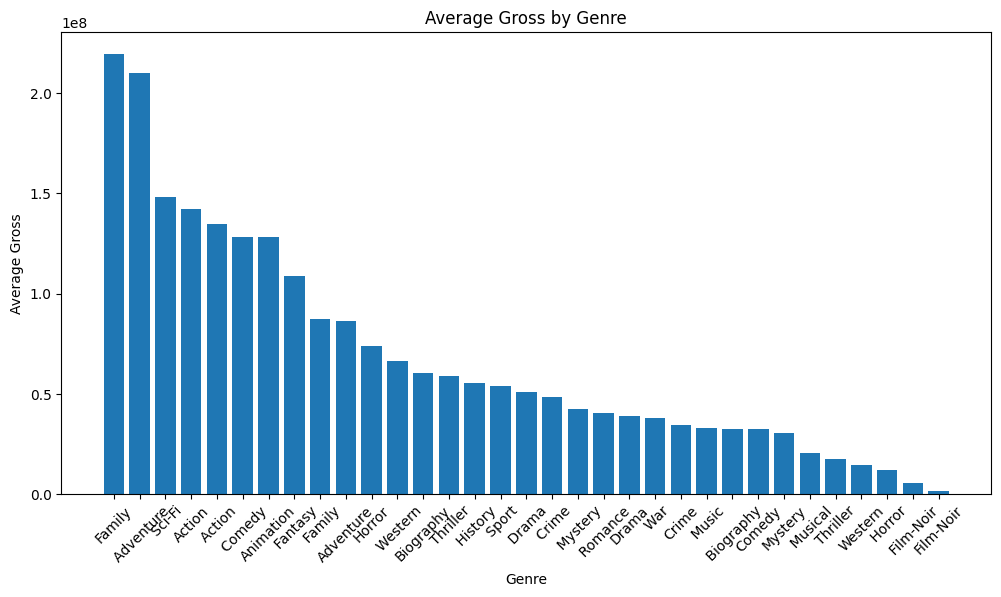

In [ ]:
data_copy = data.copy()
data_copy['Genre'] = data_copy['Genre'].str.split(',')
genre_data = pd.DataFrame({'Genre': data_copy['Genre'].explode(), 'Gross': data_copy['Gross']})
average = genre_data.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(average.index, average.values)
plt.xlabel('Genre')
plt.ylabel('Average Gross')
plt.title('Average Gross by Genre')
plt.xticks(rotation=45)
plt.show()



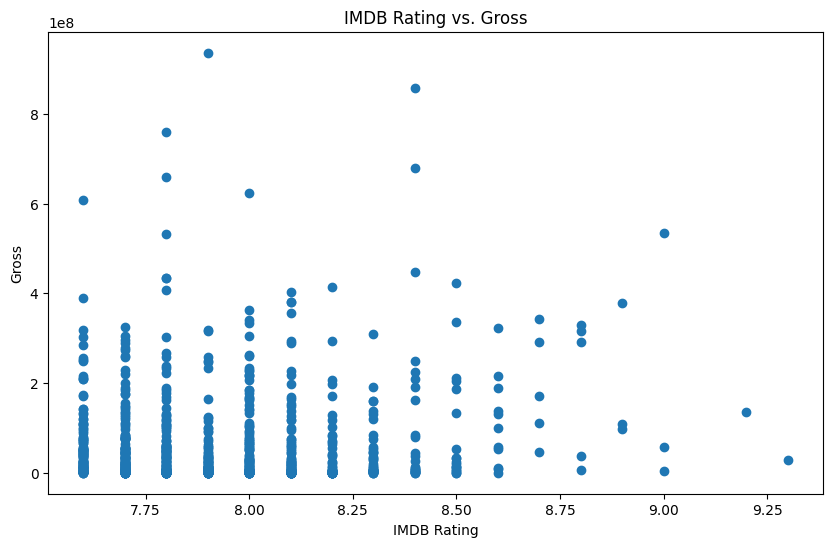

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['IMDB_Rating'], data['Gross'])
plt.xlabel('IMDB Rating')
plt.ylabel('Gross')
plt.title('IMDB Rating vs. Gross')
plt.show()


<Figure size 1200x600 with 0 Axes>

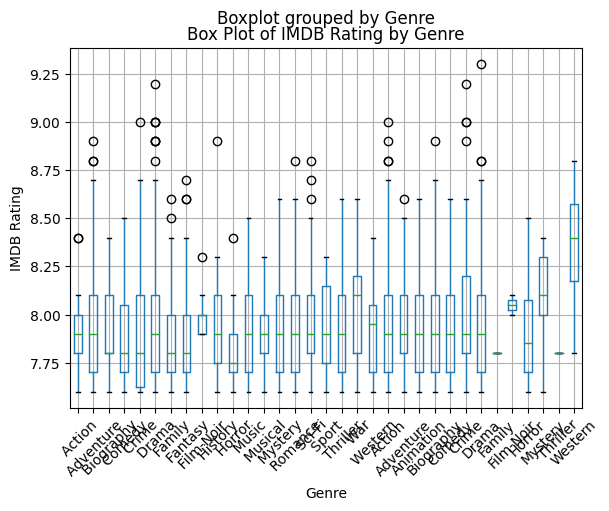

In [ ]:
data_copy = data.copy()
data_copy['Genre'] = data_copy['Genre'].str.split(',')
genre_data = pd.DataFrame({'Genre': data_copy['Genre'].explode(), 'IMDB_Rating': data_copy['IMDB_Rating']})

plt.figure(figsize=(12, 6))
genre_data.boxplot(column='IMDB_Rating', by='Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.title('Box Plot of IMDB Rating by Genre')
plt.xticks(rotation=90)
plt.show()



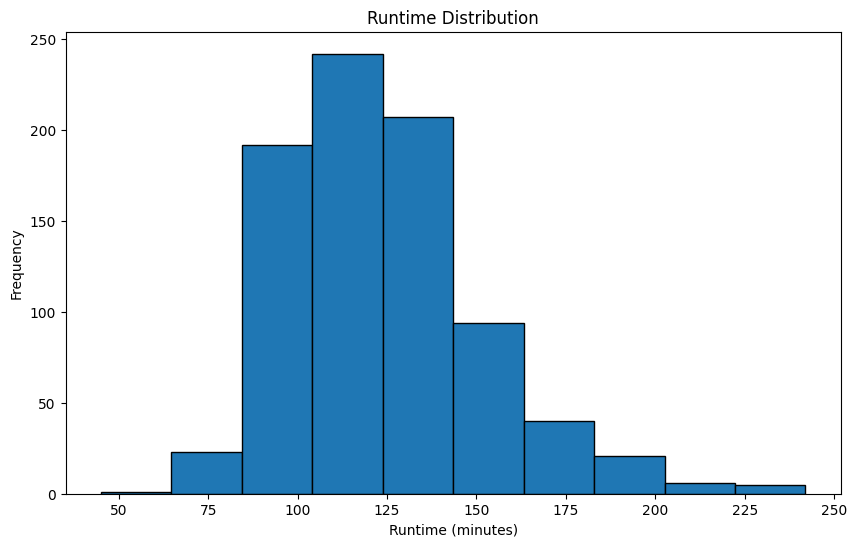

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Runtime'].astype(str).str.extract('(\d+)').astype(int), bins=10, edgecolor='black')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Runtime Distribution')
plt.show()


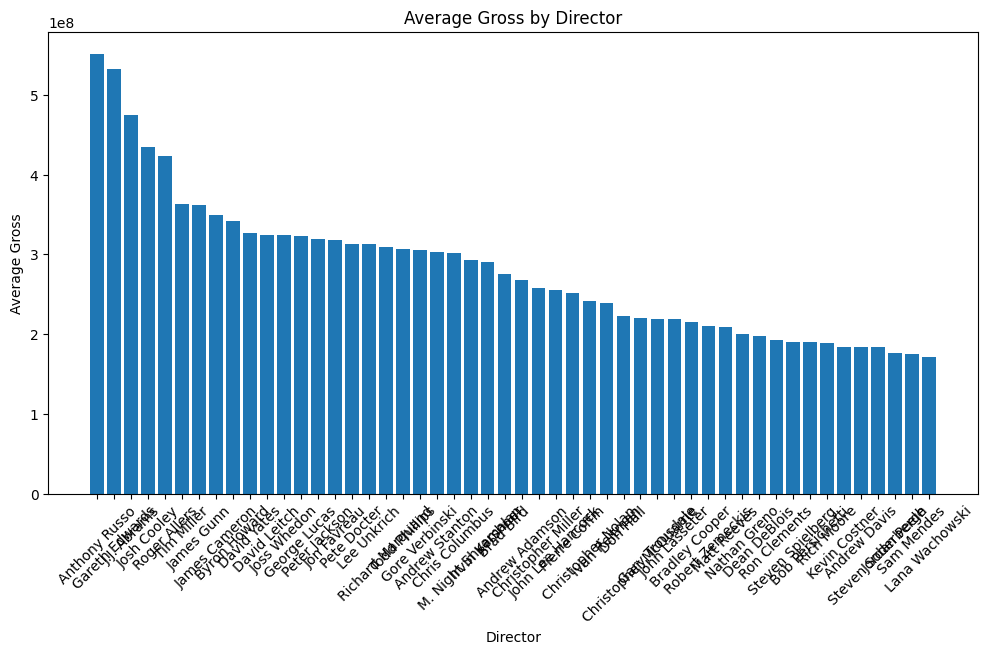

In [ ]:
director_average_gross = director_data.groupby('Director')['Gross'].mean().sort_values(ascending=False)[:50]
plt.figure(figsize=(12, 6))
plt.bar(director_average_gross.index, director_average_gross.values)
plt.xlabel('Director')
plt.ylabel('Average Gross')
plt.title('Average Gross by Director')
plt.xticks(rotation=90)
plt.show()

### ***TIME SERIES***


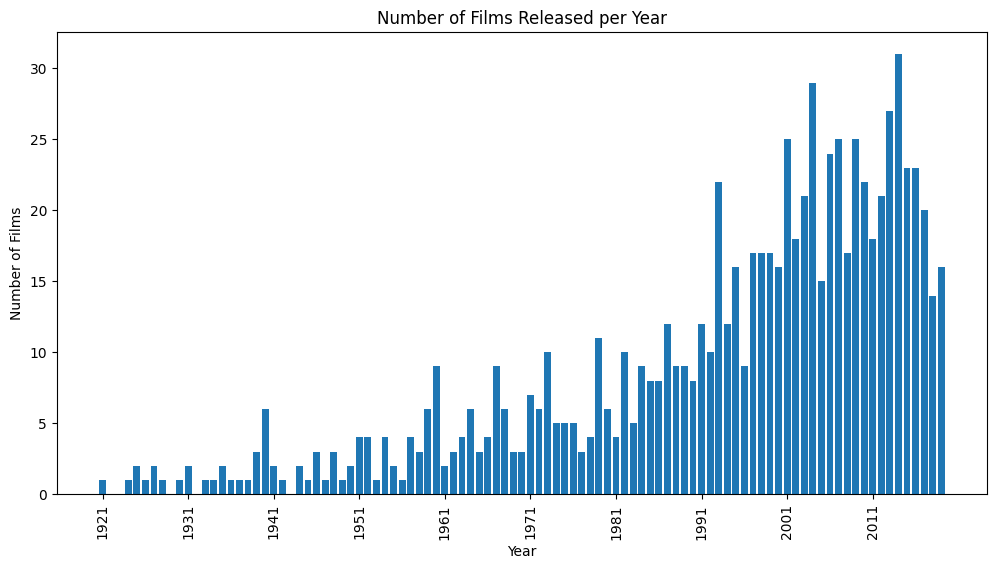

The maximum Number of movies released on the year 2014


In [ ]:
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
year = data['Released_Year'][data['Released_Year'].notnull()].astype(int)
films_per_year = year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(films_per_year.index, films_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Number of Films Released per Year')
plt.xticks(range(min(films_per_year.index), max(films_per_year.index)+1, 10), rotation=90)
plt.show()
print("The maximum Number of movies released on the year",films_per_year.idxmax())

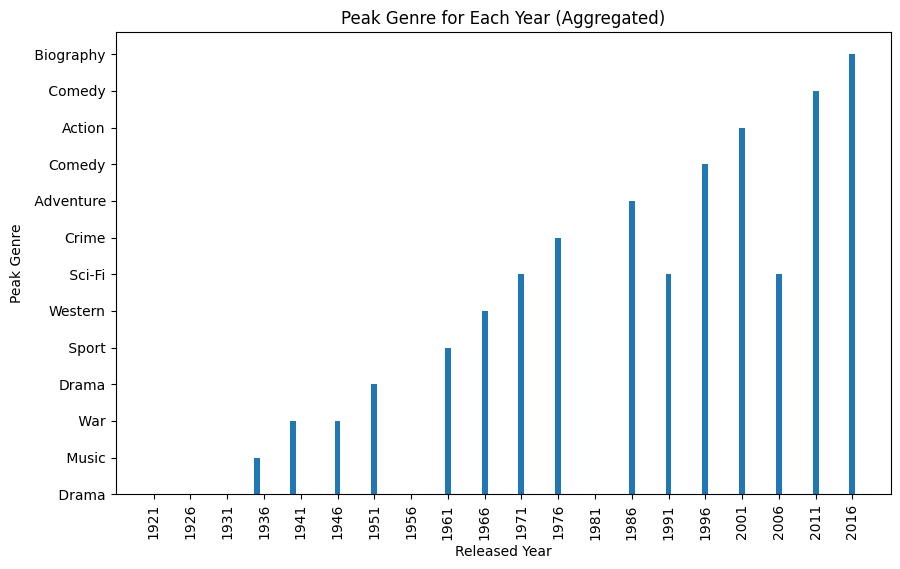

In [ ]:
data_split = data.assign(Genre=data['Genre'].str.split(',')).explode('Genre')
data_split['Released_Year'] = pd.to_numeric(data_split['Released_Year'])
genre_ratings = data_split.groupby(['Released_Year', 'Genre'])['IMDB_Rating'].mean().reset_index()
peak_genre = genre_ratings.groupby('Released_Year')['IMDB_Rating'].idxmax()
peak_genre_df = genre_ratings.loc[peak_genre]
aggregated_data = peak_genre_df[::n]
plt.figure(figsize=(10, 6))
plt.bar(aggregated_data['Released_Year'], aggregated_data['Genre'])
plt.xlabel('Released Year')
plt.ylabel('Peak Genre')
plt.title('Peak Genre for Each Year (Aggregated for 5 Years)')
plt.xticks(range(min(aggregated_data['Released_Year'].dropna().astype(int)), max(aggregated_data['Released_Year'].dropna().astype(int))+1, 5), rotation=90)
plt.show()

                 Series_Title  Series_Title_Sentiment
0    The Shawshank Redemption                    0.00
1               The Godfather                    0.00
2             The Dark Knight                    0.00
3      The Godfather: Part II                    0.00
4                12 Angry Men                   -0.51
..                        ...                     ...
990              Giù la testa                    0.00
991            Kelly's Heroes                    0.51
992           The Jungle Book                    0.00
994        A Hard Day's Night                   -0.10
997     From Here to Eternity                    0.00

[831 rows x 2 columns]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
